In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
visa_df=pd.read_csv("Visadataset.csv")
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [6]:
cat_columns=visa_df.select_dtypes(include='object').columns
num_columns=visa_df.select_dtypes(exclude='object').columns
num_columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**boxplot**

- box plot is used to identify the outliers
- outliesrs is an observation having huge positive value or hugr negative value

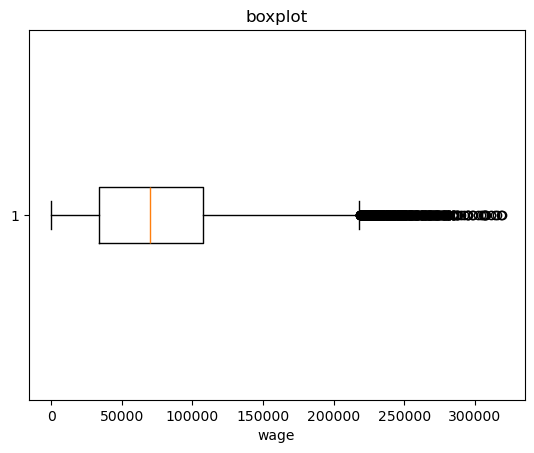

In [7]:
# read the preavailing wage data and plot the box plot
wage_data=visa_df['prevailing_wage']
plt.boxplot(wage_data,vert=False)
plt.title('boxplot')
plt.xlabel('wage')
plt.show()

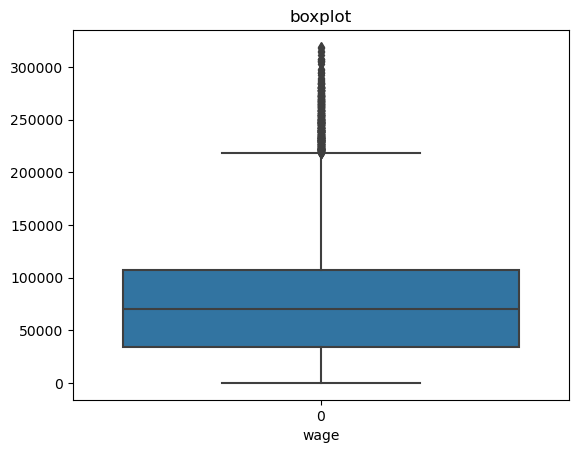

In [8]:
wage_data=visa_df['prevailing_wage']
sns.boxplot(wage_data,)
plt.title('boxplot')
plt.xlabel('wage')
plt.show()

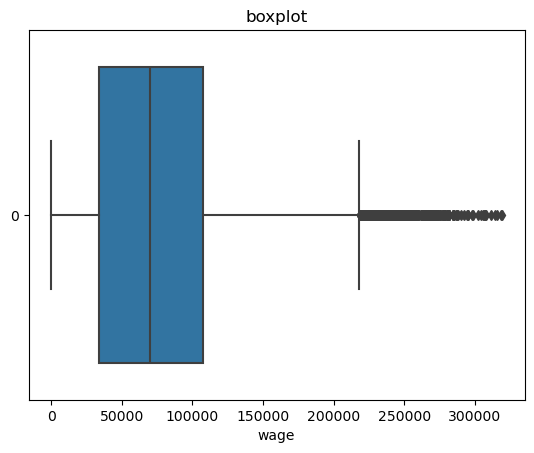

In [9]:
wage_data=visa_df['prevailing_wage']
sns.boxplot(wage_data,orient='h')
plt.title('boxplot')
plt.xlabel('wage')
plt.show()

**plot the histogram and boxplot side by side**

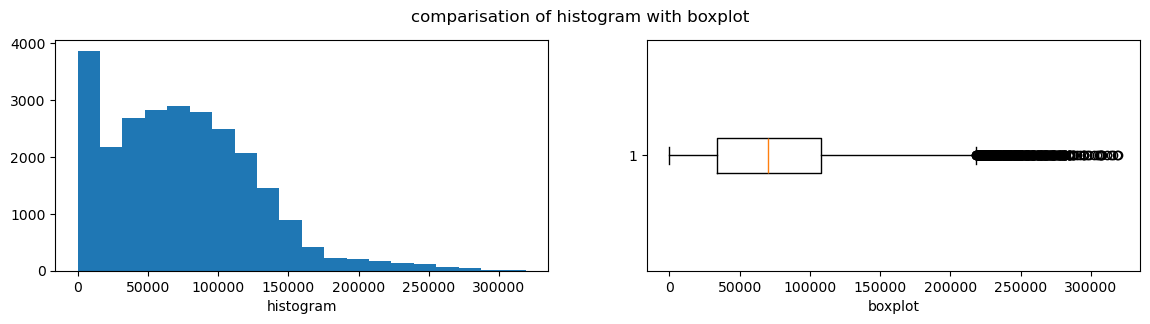

In [25]:
wage_data=visa_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.suptitle('comparisation of histogram with boxplot')
plt.subplot(1,2,1)
plt.hist(wage_data,bins=20)
plt.xlabel('histogram')
plt.subplot(1,2,2)
plt.boxplot(wage_data,vert=False)
plt.xlabel('boxplot')
plt.show()

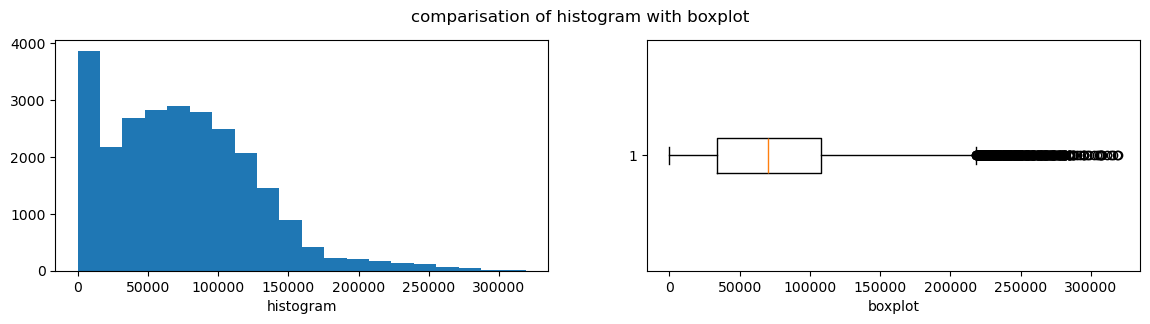

In [27]:
wage_data=visa_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.suptitle('comparisation of histogram with boxplot')
plt.subplot(1,2,1).hist(wage_data,bins=20)
plt.xlabel('histogram')
plt.subplot(1,2,2).boxplot(wage_data,vert=False)
plt.xlabel('boxplot')
plt.show()

**Finding the outliers**

- we already knopw that available less than Q1-1.5*IQR to Q3+1.5*IQR
- step-1:
  - calculate Q1=25p
     - calculate Q2=50p
    - calculate Q3=75p
- step-2: 
     - calculate IQR=Q3-Q1
- step-3:
   - calculate UB=Q3+1.5*IQR
- step-4:
    - con1= wage data<LB
    - con2= wage data>lb
    - con3= con1 or- and con2 (use btwise operations)
- step-5:data[con3]

In [37]:
wage_data=visa_df['prevailing_wage']
# step-1
q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75)
#step-2
IQR=q3-q1
#step-3
lb=q1-1.5*IQR
ub=q3-1.5*IQR
#step-4
con1=wage_data<lb
con2=wage_data>ub
con3=con1|con2

#step-5
outliers_data=wage_data[con3]
outliers_data


0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [38]:
outliers_df=visa_df[con3]
outliers_data

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [50]:
wage_data=visa_df['prevailing_wage']
# step-1
q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75)
#step-2
IQR=q3-q1
#step-3
lb=q1-1.5*IQR
ub=q3-1.5*IQR
#step-4
con1=wage_data<lb
con2=wage_data>ub
con3=con1|con2

#step-5
non_outliers_df=wage_data[con3]
non_outliers_df


0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [ ]:
- we have two daraframes
- visa_df:total data 25480
- non_outliers_df= removing outliers 25053
- first plot nonoutliers data prevailing wage histogram and

In [1]:
wage_data_non_outliers=non_outliers_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.suptitle('comparisation of histogram with boxplot')
plt.subplot(1,2,1).hist(wage_data,bins=20)
plt.xlabel('histogram')
plt.subplot(1,2,2).boxplot(wage_data,vert=False)
plt.xlabel('boxplot')
plt.show()

NameError: name 'non_outliers_df' is not defined

In [52]:
wage_data_non_outliers=non_outliers_df['prevailing_wage']
wage_data=visa_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.suptitle('comparisation of histogram with boxplot')
plt.subplot(1,2,1).hist(wage_data,bins=20)
plt.xlabel('histogram')
plt.subplot(1,2,3).boxplot(wage_data,vert=False)
plt.xlabel('boxplot')
plt.show()

KeyError: 'prevailing_wage'